In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import files
files.upload()

Saving car2.jpg to car2.jpg


{'car2.jpg': b'\xff\xd8\xff\xfe\x00\x10Lavc56.60.100\x00\xff\xdb\x00C\x00\x08\x0e\x0e\x10\x0e\x10\x13\x13\x13\x13\x13\x13\x16\x15\x16\x17\x17\x17\x16\x16\x16\x16\x17\x17\x17\x19\x19\x19\x1d\x1d\x1d\x19\x19\x19\x17\x17\x19\x19\x1c\x1c\x1d\x1d ! \x1e\x1e\x1d\x1e!!###**((112<<H\xff\xc4\x01\xa2\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x01\x00\x03\x01\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe

In [4]:
file_name = 'car2.jpg'

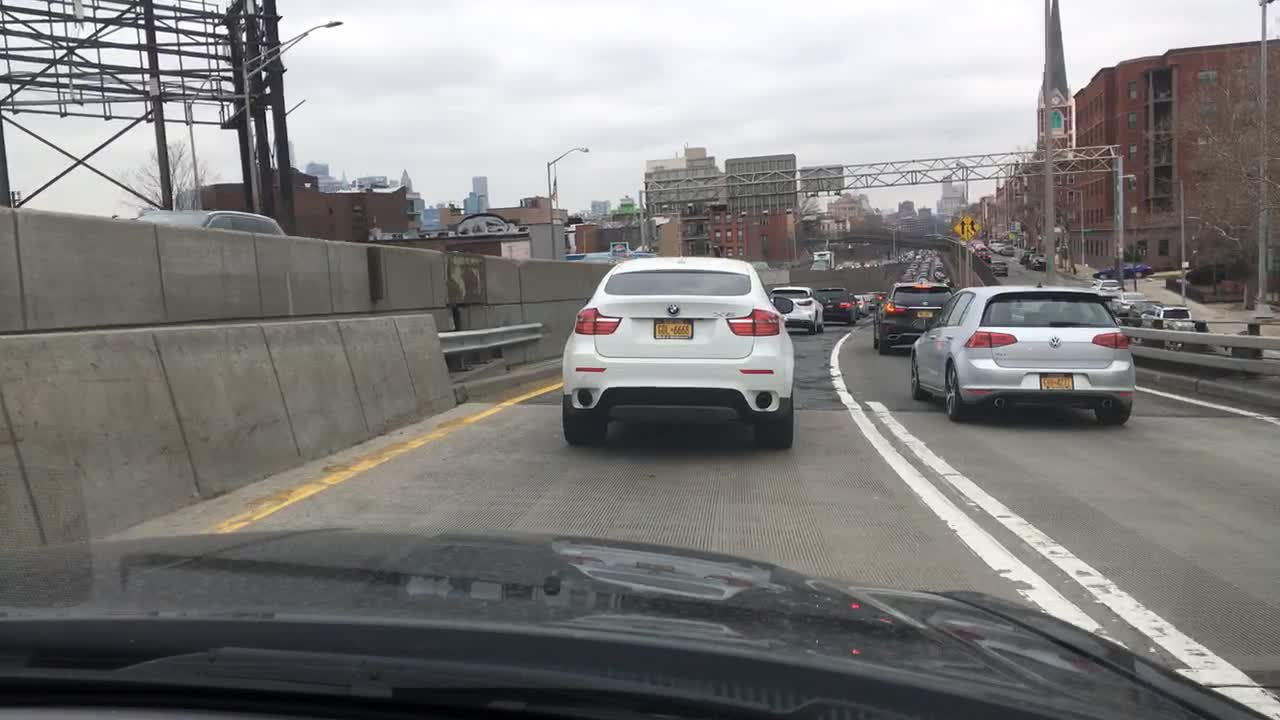

In [5]:
img = cv2.imread(file_name)
cv2_imshow(img)

In [33]:
height, width, channel = img.shape

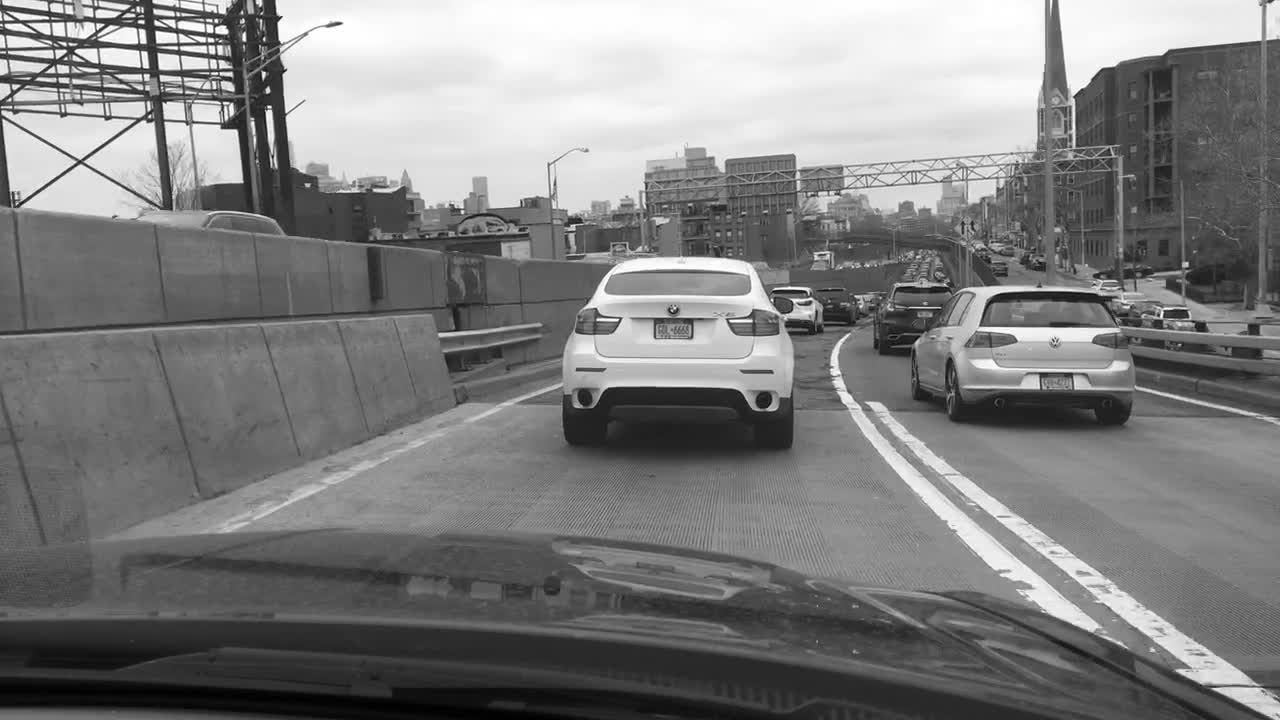

In [8]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

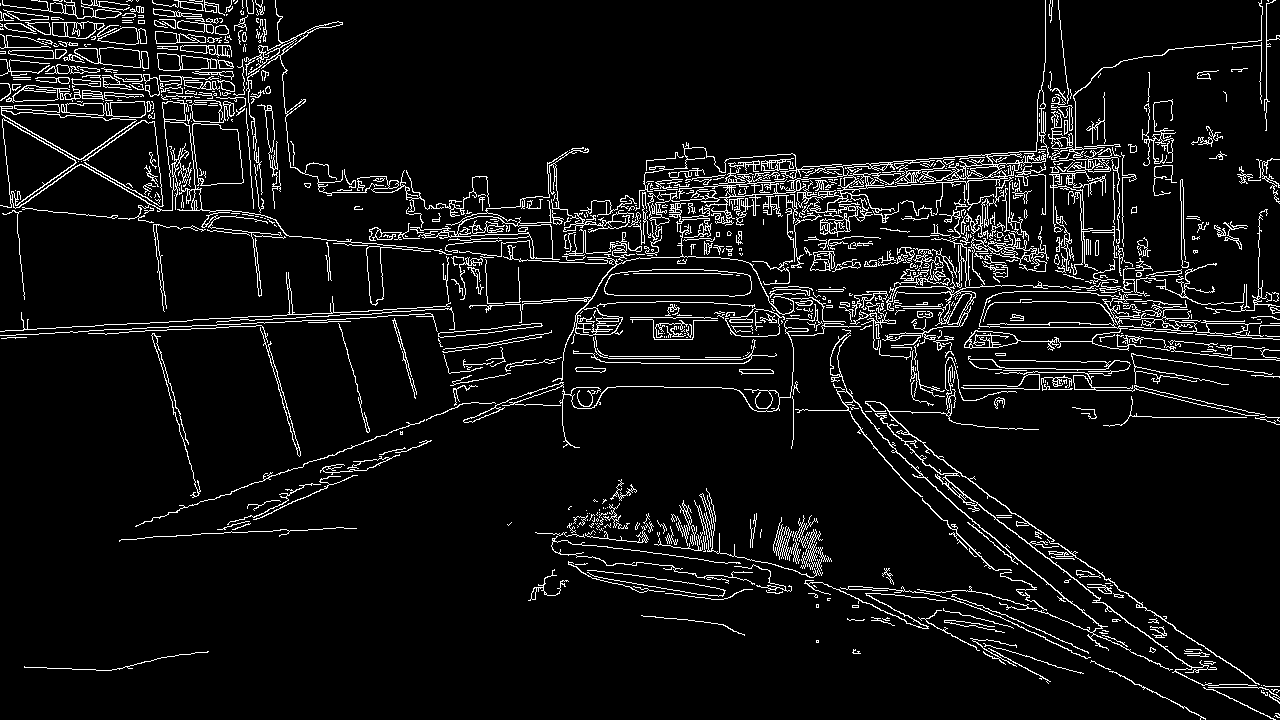

In [26]:
canny = cv2.Canny(gray,50,200)
canny2 = cv2.Canny(img,50,200)
cv2_imshow(canny)

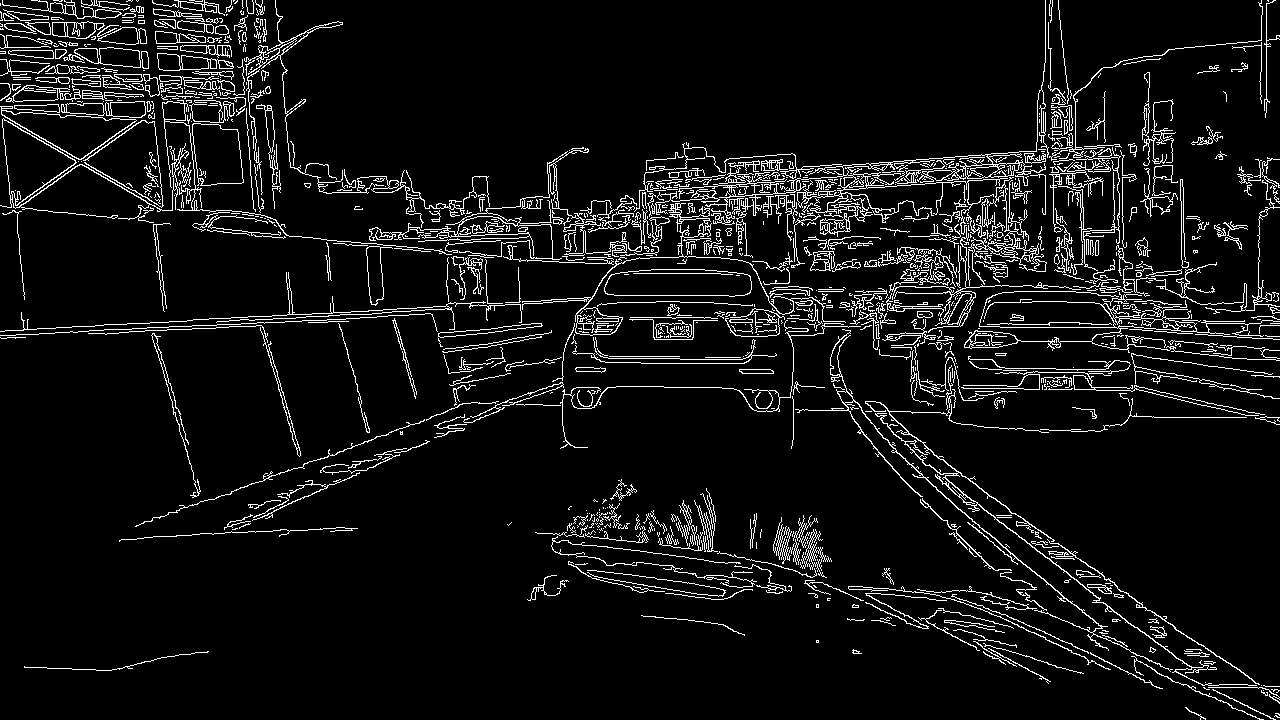

In [28]:
cv2_imshow(canny2)

In [112]:
mask = np.zeros(canny.shape,dtype=np.uint8)
x1,y1 = int(0.4 * width),int(0.53 * height)
width1 = int(0.1 * width)

x2,y2 = int(0.2 * height), int(0.75* height)

polygons = np.array([[(x1,y1),(x1+width1,y1),(x2+width1 , y2),(x2,y2)]])
cv2.fillPoly(mask, polygons,(255,255,255))
#cv2_imshow(mask)
x1,y1 = int(0.6 * width),int(0.5 * height)
width1 = int(0.1 * width)

x2,y2 = width,height
polygons = np.array([[(x1,y1),(x1+width1,y1),(x2,y2),(x2-width1 , y2)]])
cv2.fillPoly(mask, polygons,(255,255,255))
result = cv2.bitwise_and(mask,canny)


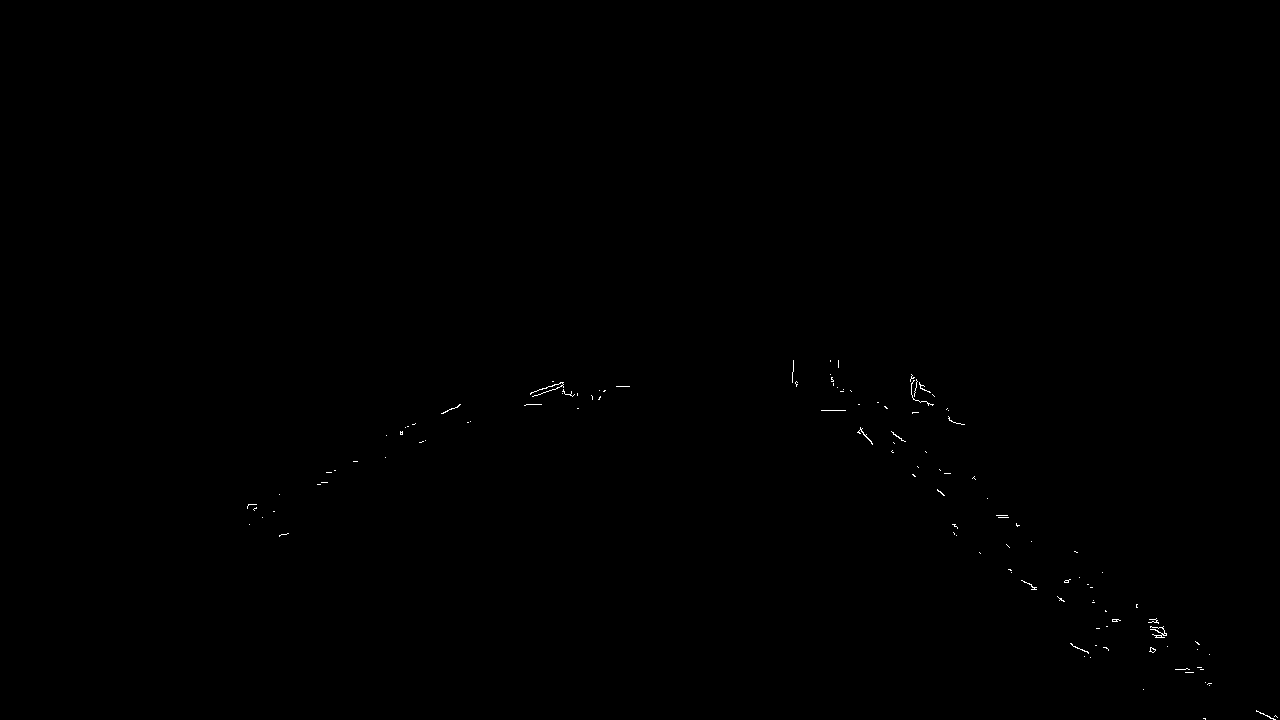

In [108]:
lines = cv2.HoughLinesP(result,2, np.pi / 180, 20, np.array([]), 20, 10)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(result, (x1,y1),(x2,y2), (0,255,0), 3)
cv2_imshow(result)

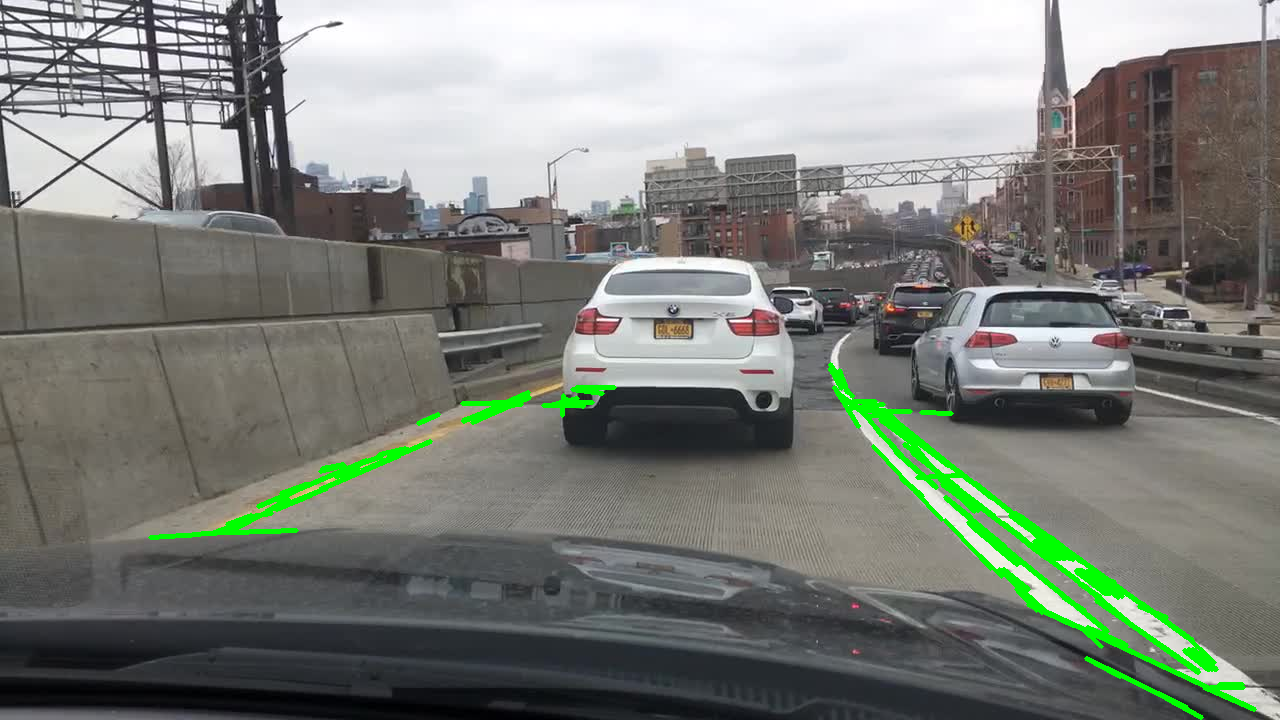

In [111]:
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(img, (x1,y1),(x2,y2), (0,255,0), 2)

cv2_imshow(img)